In [1]:
# Import Library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Load Dataset
X_train, Y_train = np.load('../dataset/test/X_train.npy'), np.load('../dataset/test/Y_train.npy')
X_test, Y_test = np.load('../dataset/test/X_test.npy'), np.load('../dataset/test/Y_test.npy')
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3000, 64, 64, 3) (3000, 3)
(1000, 64, 64, 3) (1000, 3)


[2]


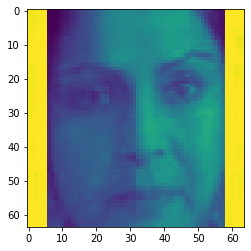

In [17]:
random_idx = np.random.randint(0, X_train.shape[0], 1)
random_img = X_train[random_idx][0]
random_img_label = np.argmax(Y_train[random_idx], axis=1)
plt.imshow(random_img[:, :, 0])
print(random_img_label)

In [18]:
# Feature Normalization
X_train, X_test = X_train/255., X_test/255.

In [32]:
# Model 1: Build Vanilla CNN
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_hidden)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Dropout(0.5)(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(512, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn1 = Model(model_input, model_output)
model_cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 16)        64        
__________

In [33]:
# Model 2: activation function (relu)
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='relu')(model_hidden)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Dropout(0.5)(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(512, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn2 = Model(model_input, model_output)
model_cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 16)        64        
__________

In [34]:
# Model 3: deeper mlp layer number
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_hidden)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Dropout(0.5)(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(1024, activation='relu')(model_hidden)
model_hidden = Dense(512, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn3 = Model(model_input, model_output)
model_cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 16)        64        
__________

In [35]:
# Model 4: delete one conv layer
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Dropout(0.5)(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(512, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn4 = Model(model_input, model_output)
model_cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               8389120   
__________

In [36]:
# Model 5: change optimizer to adam
model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_input)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Conv2D(16, kernel_size=(2, 2), padding='same', activation='tanh')(model_hidden)
model_hidden = MaxPooling2D((2, 2))(model_hidden)
model_hidden = BatchNormalization()(model_hidden)
model_hidden = Dropout(0.5)(model_hidden)
model_hidden = Flatten()(model_hidden)
model_hidden = Dense(512, activation='relu')(model_hidden)
model_output = Dense(Y_train.shape[1], activation='softmax')(model_hidden)
model_cnn5 = Model(model_input, model_output)
model_cnn5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 16)        1040      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 16, 16)        64        
__________

In [37]:
# Optimization Method
model_cnn1.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])
model_cnn2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])
model_cnn3.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])
model_cnn4.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])
model_cnn5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [38]:
# Train
es = EarlyStopping(monitor='val_loss', patience=3, mode='auto')
model_history1 = model_cnn1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1500, verbose=2, shuffle=True, callbacks = [es])
model_history2 = model_cnn2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1500, verbose=2, shuffle=True, callbacks = [es])
model_history3 = model_cnn3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1500, verbose=2, shuffle=True, callbacks = [es])
model_history4 = model_cnn4.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1500, verbose=2, shuffle=True, callbacks = [es])
model_history5 = model_cnn5.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=1500, verbose=2, shuffle=True, callbacks = [es])

Train on 3000 samples, validate on 1000 samples
Epoch 1/50
 - 213s - loss: 1.0964 - acc: 0.3563 - val_loss: 1.0691 - val_acc: 0.5170
Epoch 2/50
 - 54s - loss: 1.0728 - acc: 0.5070 - val_loss: 1.5482 - val_acc: 0.5170
Epoch 3/50
 - 21s - loss: 0.9857 - acc: 0.5070 - val_loss: 1.5549 - val_acc: 0.5170
Epoch 4/50
 - 18s - loss: 0.9663 - acc: 0.4950 - val_loss: 1.6458 - val_acc: 0.5170
Train on 3000 samples, validate on 1000 samples
Epoch 1/50
 - 77s - loss: 1.0951 - acc: 0.3950 - val_loss: 1.2621 - val_acc: 0.3800
Epoch 2/50
 - 70s - loss: 1.0639 - acc: 0.5070 - val_loss: 0.9919 - val_acc: 0.3800
Epoch 3/50
 - 20s - loss: 0.9749 - acc: 0.5070 - val_loss: 0.9558 - val_acc: 0.3800
Epoch 4/50
 - 17s - loss: 0.9598 - acc: 0.5070 - val_loss: 0.9480 - val_acc: 0.5170
Epoch 5/50
 - 16s - loss: 0.9611 - acc: 0.5070 - val_loss: 0.9451 - val_acc: 0.5170
Epoch 6/50
 - 16s - loss: 0.9624 - acc: 0.5067 - val_loss: 0.9486 - val_acc: 0.5170
Epoch 7/50
 - 16s - loss: 0.9647 - acc: 0.5063 - val_loss: 0.95

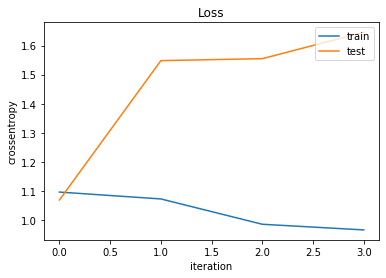

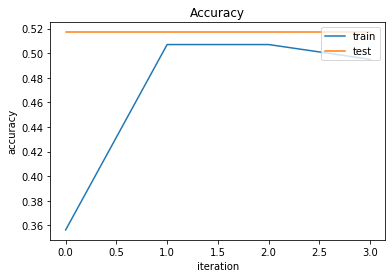

In [39]:
# Validation: Curve Plotting
# Loss
# Model 1
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history1.history['acc'])
plt.plot(model_history1.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

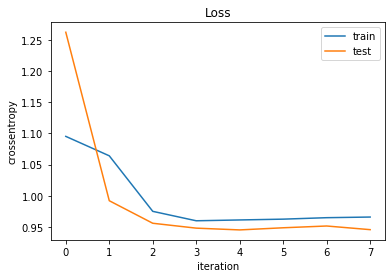

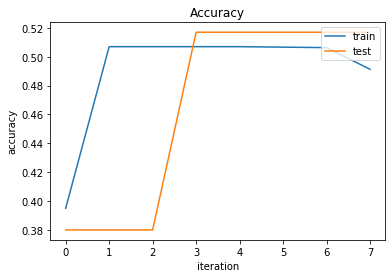

In [40]:
# Validation: Curve Plotting
# Loss
# Model 2
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history2.history['acc'])
plt.plot(model_history2.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

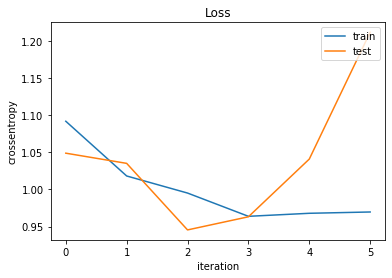

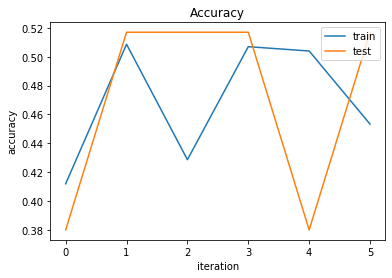

In [41]:
# Validation: Curve Plotting
# Loss
# Model 3
plt.plot(model_history3.history['loss'])
plt.plot(model_history3.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history3.history['acc'])
plt.plot(model_history3.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

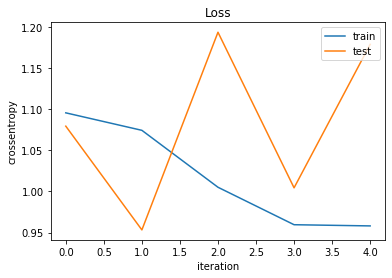

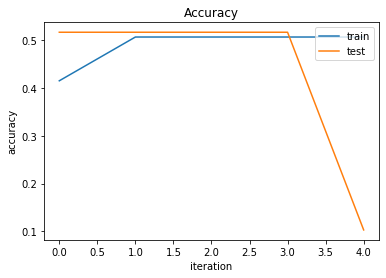

In [42]:
# Validation: Curve Plotting
# Loss
# Model 4
plt.plot(model_history4.history['loss'])
plt.plot(model_history4.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history4.history['acc'])
plt.plot(model_history4.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

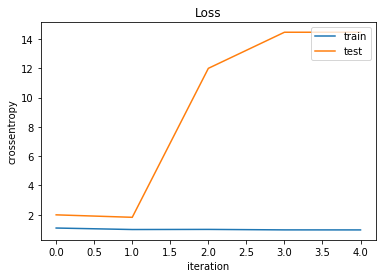

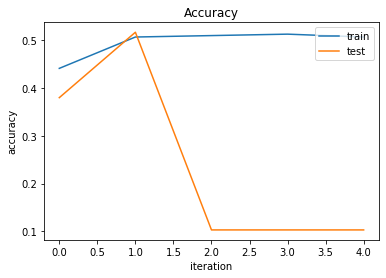

In [43]:
# Validation: Curve Plotting
# Loss
# Model 5
plt.plot(model_history5.history['loss'])
plt.plot(model_history5.history['val_loss'])
plt.title('Loss')
plt.xlabel('iteration'), plt.ylabel('crossentropy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# Accuracy
plt.plot(model_history5.history['acc'])
plt.plot(model_history5.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('iteration'), plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

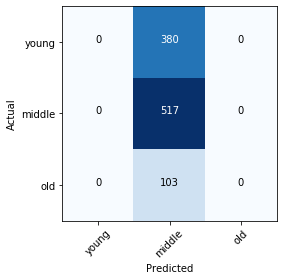

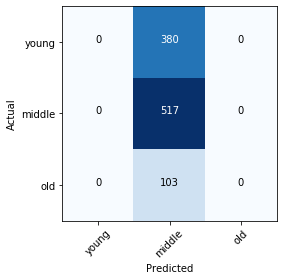

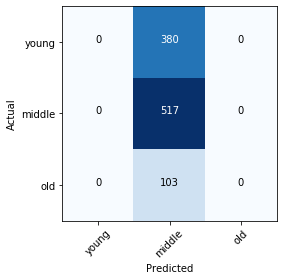

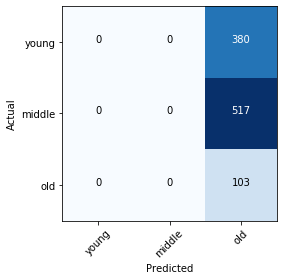

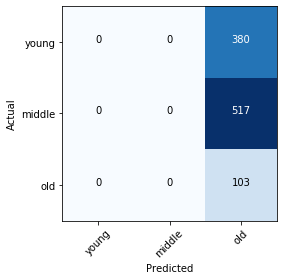

In [46]:
# Confusion Matrix
# Validation: Confusion Matrix Analysis
def plot_confusion_matrix(model_input, feature, label, class_info):
    pred = model_input.predict(feature)
    cnf_matrix = confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45), plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j], horizontalalignment='center', color='white' if cnf_matrix[i,j]>thresh else 'black')
    plt.ylabel('Actual'), plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(model_cnn1, X_test, Y_test, ['young', 'middle', 'old'])
plot_confusion_matrix(model_cnn2, X_test, Y_test, ['young', 'middle', 'old'])
plot_confusion_matrix(model_cnn3, X_test, Y_test, ['young', 'middle', 'old'])
plot_confusion_matrix(model_cnn4, X_test, Y_test, ['young', 'middle', 'old'])
plot_confusion_matrix(model_cnn5, X_test, Y_test, ['young', 'middle', 'old'])

In [48]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier


NotImplementedError: Multilabel and multi-output classification is not supported.